In [2]:
import torch
import numpy as np

from svpg.utils.utils import load_algo_data
from svpg.visu.state_visitation import plot_state_visitation

import matplotlib.pyplot as plt
from omegaconf import OmegaConf

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
config = OmegaConf.create({
    "algorithm": {
        "seed": 4,
        "n_evals": 100,
    },
    "gym_env": {
        "classname": "svpg.agents.env.make_gym_env",
        "env_name": "CartPole-v1",
        "max_episode_steps": 500,
    }
})

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [5]:
env_name = "CartPole-v1"
directory = f"../runs/{env_name}/22-05-07/14-17-09/"

a2c_agents, _, a2c_rewards = load_algo_data(directory + "A2C-independant", device)
svpg_agents, _, svpg_rewards = load_algo_data(directory + "A2C-SVPG", device)
svpga_agents, _, svpga_rewards = load_algo_data(directory + "A2C-SVPG_annealed", device)


In [17]:
a2c_best = (a2c_rewards.mean(axis=1)).argmax()
svpg_best = (svpg_rewards.mean(axis=1)).argmax()
svpga_best = (svpga_rewards.mean(axis=1)).argmax()

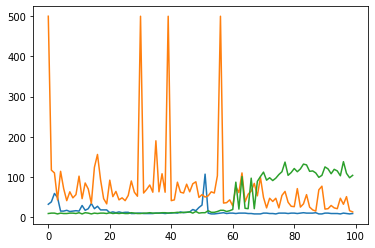

In [18]:
plt.plot(np.arange(a2c_rewards.shape[1]), a2c_rewards[a2c_best])
plt.plot(np.arange(svpg_rewards.shape[1]), svpg_rewards[svpg_best])
plt.plot(np.arange(svpga_rewards.shape[1]), svpga_rewards[svpga_best])

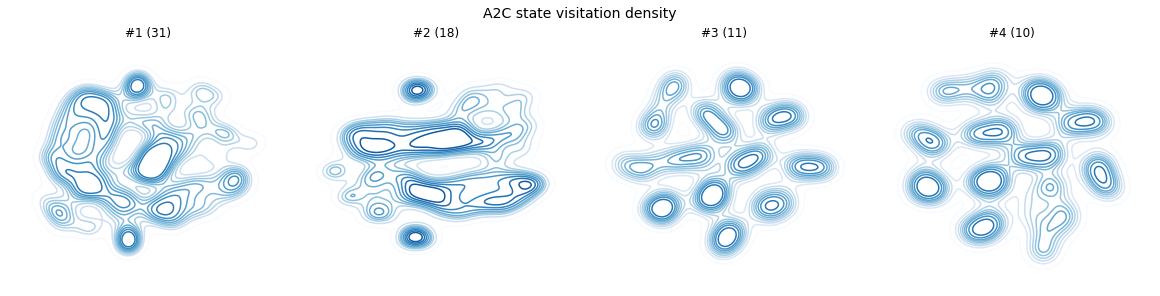

In [4]:
plot_state_visitation(config, a2c_agents, a2c_rewards, "A2C", device=device, cmap="Blues", save=False)


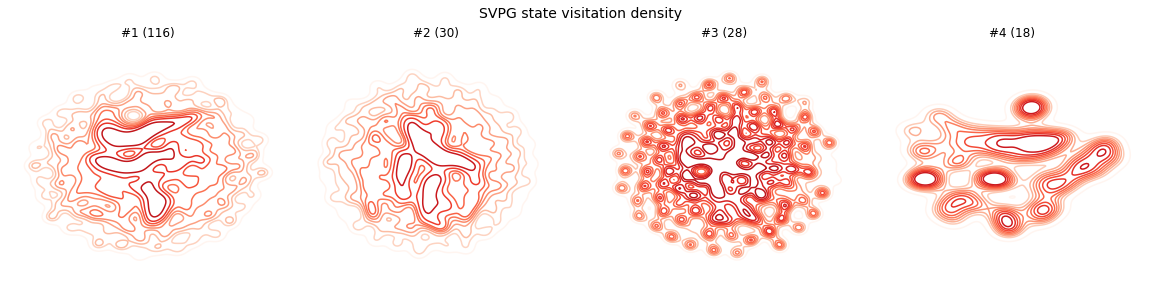

In [6]:
plot_state_visitation(config, svpg_agents, svpg_rewards, "SVPG", device=device, cmap="Reds", save=False)


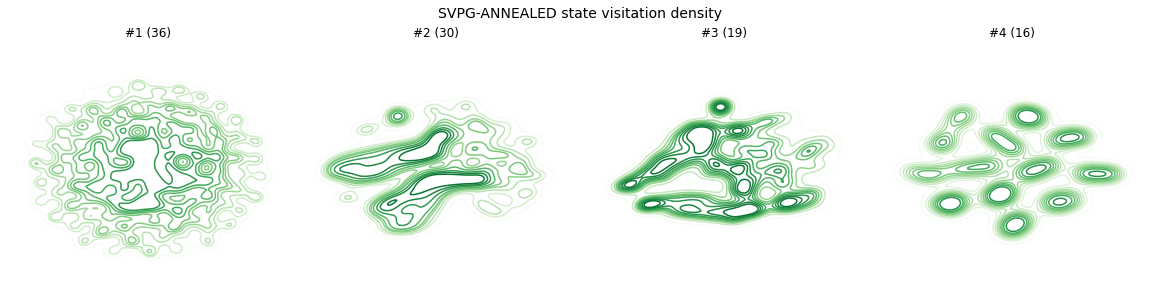

In [7]:
plot_state_visitation(config, svpga_agents, svpga_rewards, "SVPG-ANNEALED", device=device, cmap="Greens", save=False)
